# **Financial Inclusion in Africa - Zindi Competition**

## **1. Problem Statement**
Financial inclusion remains a major challenge to economic and human development in Africa. In Kenya, Rwanda, Tanzania, and Uganda, only **14% of adults** (9.1 million) have access to or use a commercial bank account.

Despite the rise of mobile money and fintech solutions, **banks still play a crucial role** in financial inclusion. Access to bank accounts allows individuals to:
- Save and make payments  
- Build creditworthiness  
- Access loans, insurance, and related financial services  

### **Objective**
The goal of this competition is to **develop a machine learning model** that predicts whether an individual is likely to have a bank account. The insights gained from the model can:
- Measure financial inclusion in the target countries  
- Identify key factors affecting financial security  

---

## **2. Dataset Overview**
The dataset consists of survey responses from Kenya, Rwanda, Tanzania, and Uganda. Each row represents an individual's response to the survey.  

### **Variable Definitions**
| Feature | Description |
|---------|------------|
| `country` | Country where the interviewee is located |
| `year` | Year the survey was conducted |
| `uniqueid` | Unique identifier for each respondent |
| `location_type` | Type of location: Rural or Urban |
| `cellphone_access` | Does the respondent have access to a cellphone? (Yes/No) |
| `household_size` | Number of people living in the respondent's household |
| `age_of_respondent` | Age of the respondent |
| `gender_of_respondent` | Gender: Male or Female |
| `relationship_with_head` | Relationship to head of household (e.g., Head, Spouse, Child, etc.) |
| `marital_status` | Marital status (Married, Single, Divorced, etc.) |
| `education_level` | Highest education level attained |
| `job_type` | Employment category (e.g., Farming, Self-employed, Government job, etc.) |
| `bank_account` *(Target Variable)* | Does the respondent have a bank account? (Yes = 1, No = 0) |

---

## Load and Inspect the Data

In [1]:
import pandas as pd

# Load datasets
train = pd.read_csv("data/Train.csv")
test = pd.read_csv("data/Test.csv")

# Basic info
print(train.shape, test.shape)


(23524, 13) (10086, 12)


In [2]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:

print(train.info())  # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


## Exploratory Data Analysis (EDA)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt



#### 1. What is the distribution of bank account ownership across the four countries?

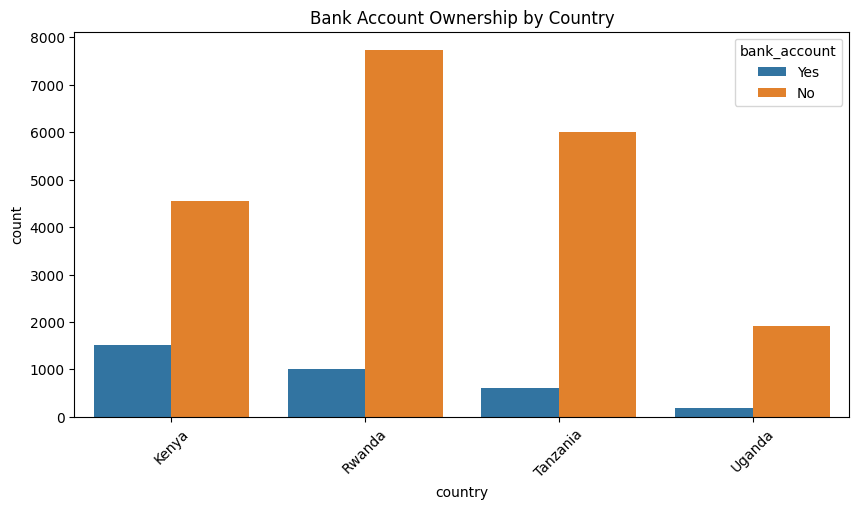

In [5]:
# 1. Distribution of bank account ownership across countries
plt.figure(figsize=(10,5))
sns.countplot(x="country", hue="bank_account", data=train)
plt.title("Bank Account Ownership by Country")
plt.xticks(rotation=45)
plt.show()

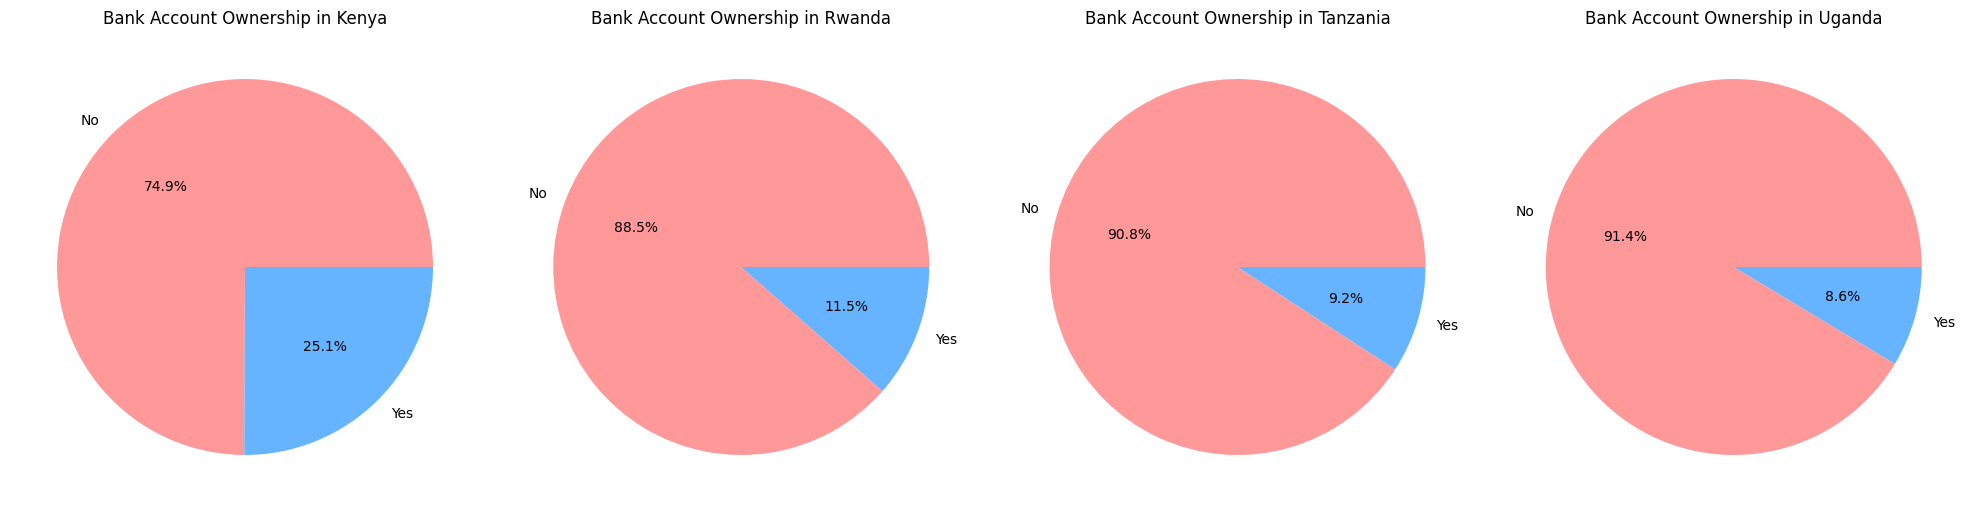

In [6]:
# 1. Distribution of bank account ownership across countries ( using pie charts )
# Get unique countries
countries = train["country"].unique()

# Set up the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Loop through each country and plot a pie chart
for i, country in enumerate(countries):
    # Filter data for the country
    country_data = train[train["country"] == country]["bank_account"].value_counts()
    
    # Pie chart
    axes[i].pie(country_data, labels=country_data.index, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"])
    axes[i].set_title(f"Bank Account Ownership in {country}")

# Show plot
plt.tight_layout()
plt.show()

#### 2. How does location type (Rural vs. Urban) affect bank account ownership?

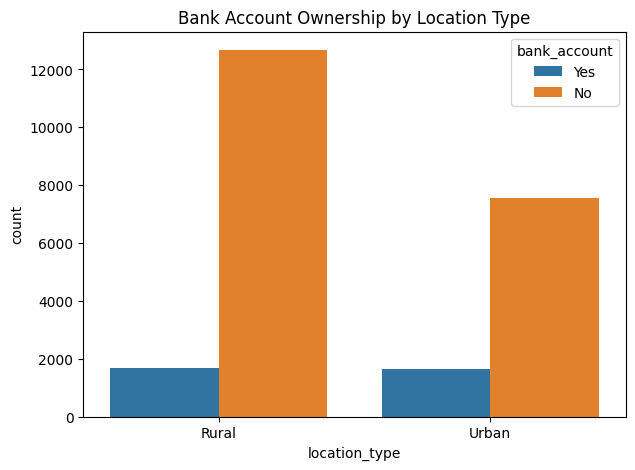

In [7]:
# 2. Location type (Rural vs. Urban) effect on bank account ownership
plt.figure(figsize=(7,5))
sns.countplot(x="location_type", hue="bank_account", data=train)
plt.title("Bank Account Ownership by Location Type")
plt.show()

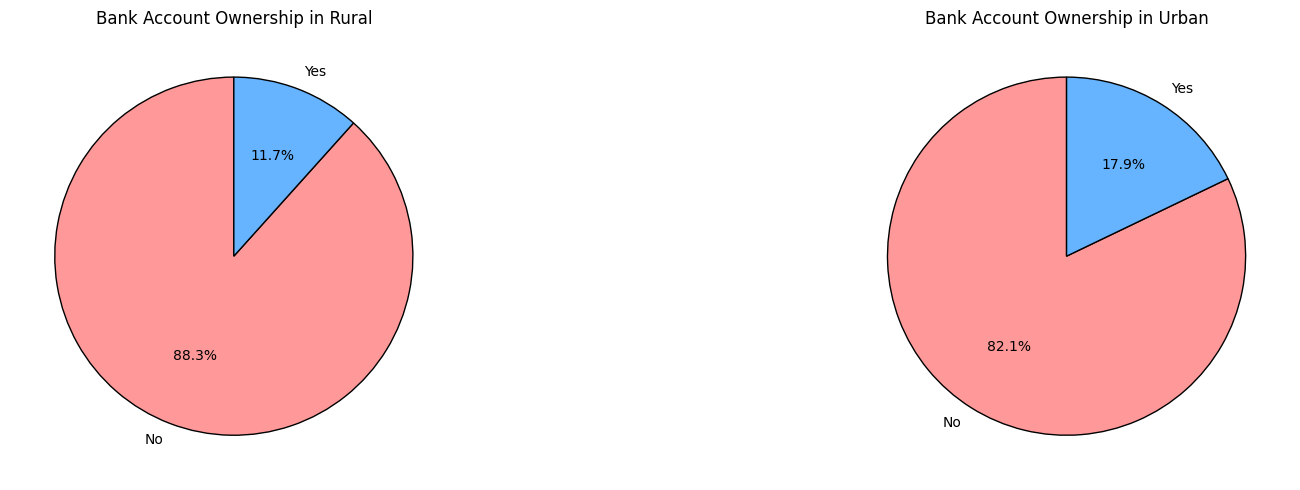

In [8]:
# 2. Location type (Rural vs. Urban) effect on bank account ownership (using pie chart)
# Get unique location_type
location_types = train["location_type"].unique()

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Loop through each location_type and plot a pie chart
for i, location_type in enumerate(location_types):
    # Filter data for the location_type
    location_type_data = train[train["location_type"] == location_type]["bank_account"].value_counts()
    
    # Pie chart
    axes[i].pie(location_type_data, labels=location_type_data.index, autopct='%1.1f%%', 
                colors=["#ff9999", "#66b3ff"], startangle=90, wedgeprops={"edgecolor": "black"})
    axes[i].set_title(f"Bank Account Ownership in {location_type}")

# Show plot
plt.tight_layout()
plt.show()


#### 3. What is the age distribution of individuals with and without bank accounts?

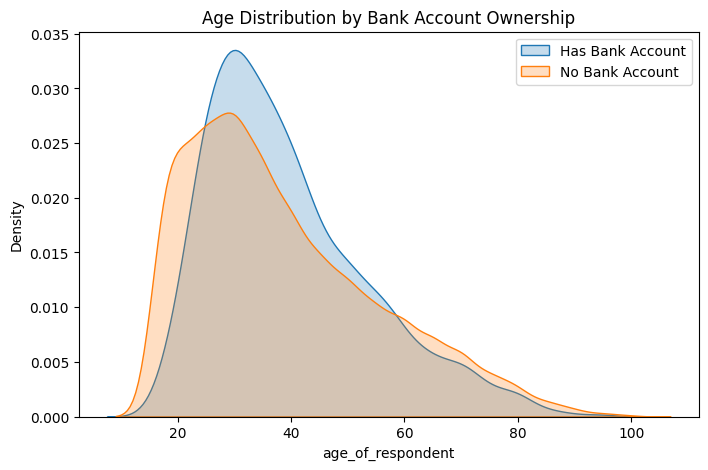

In [9]:
# 3. Age distribution of individuals with and without bank accounts
plt.figure(figsize=(8,5))
sns.kdeplot(train[train["bank_account"]=="Yes"]["age_of_respondent"], label="Has Bank Account", fill=True)
sns.kdeplot(train[train["bank_account"]=="No"]["age_of_respondent"], label="No Bank Account", fill=True)
plt.title("Age Distribution by Bank Account Ownership")
plt.legend()

#### 4. How does education level impact the likelihood of having a bank account?

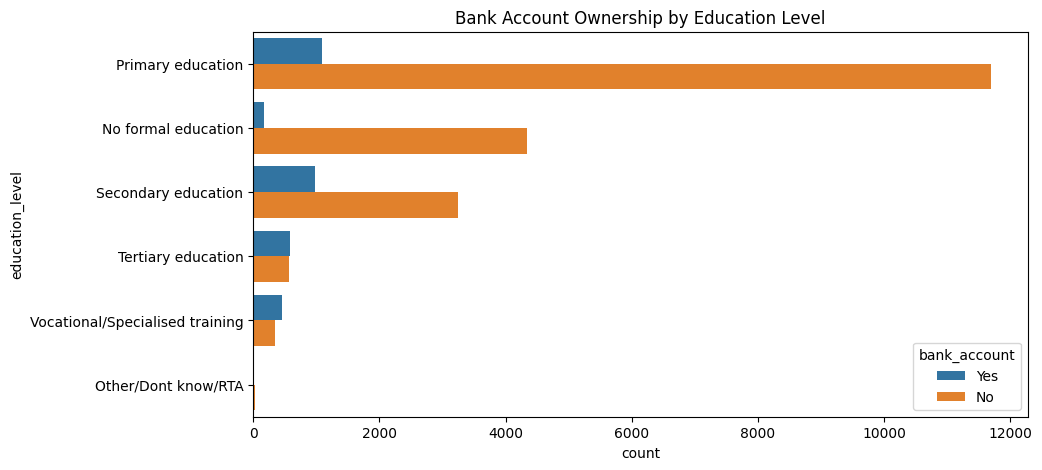

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(y="education_level", hue="bank_account", data=train, order=train["education_level"].value_counts().index)
plt.title("Bank Account Ownership by Education Level")
plt.show()

#### 5. Is there a relationship between job type and bank account ownership?

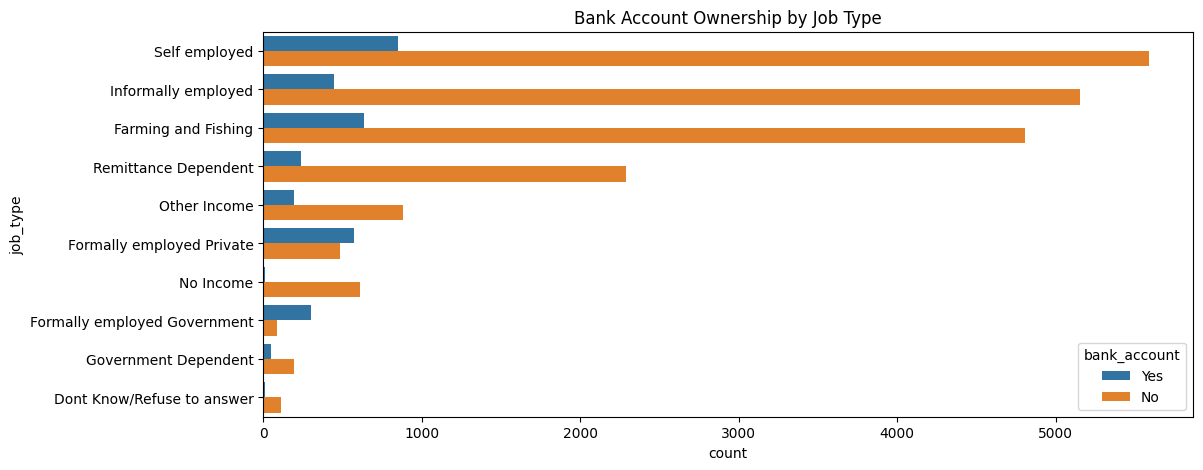

In [11]:
# 5. Job type and bank account ownership
plt.figure(figsize=(12,5))
sns.countplot(y="job_type", hue="bank_account", data=train, order=train["job_type"].value_counts().index)
plt.title("Bank Account Ownership by Job Type")
plt.show()

#### 6. What is the average household size for individuals with and without bank accounts?

C:\Users\user\AppData\Local\Temp\ipykernel_10628\4087019746.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="bank_account", y="household_size", data=train, palette="muted")


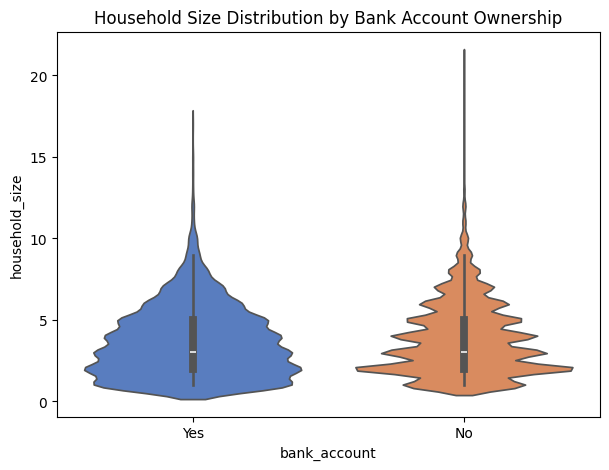

In [12]:
# 6. Average household size for individuals with and without bank accounts

# Plotting the violin plot
plt.figure(figsize=(7,5))
sns.violinplot(x="bank_account", y="household_size", data=train, palette="muted")
plt.title("Household Size Distribution by Bank Account Ownership")
plt.show()

#### 7. How does marital status influence bank account ownership?

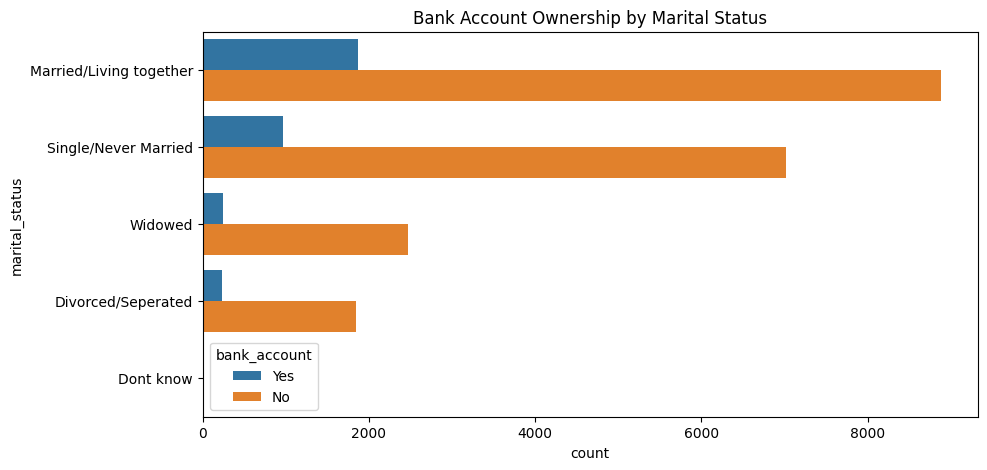

In [13]:
# 7. Marital status and bank account ownership
plt.figure(figsize=(10,5))
sns.countplot(y="marital_status", hue="bank_account", data=train, order=train["marital_status"].value_counts().index)
plt.title("Bank Account Ownership by Marital Status")
plt.show()

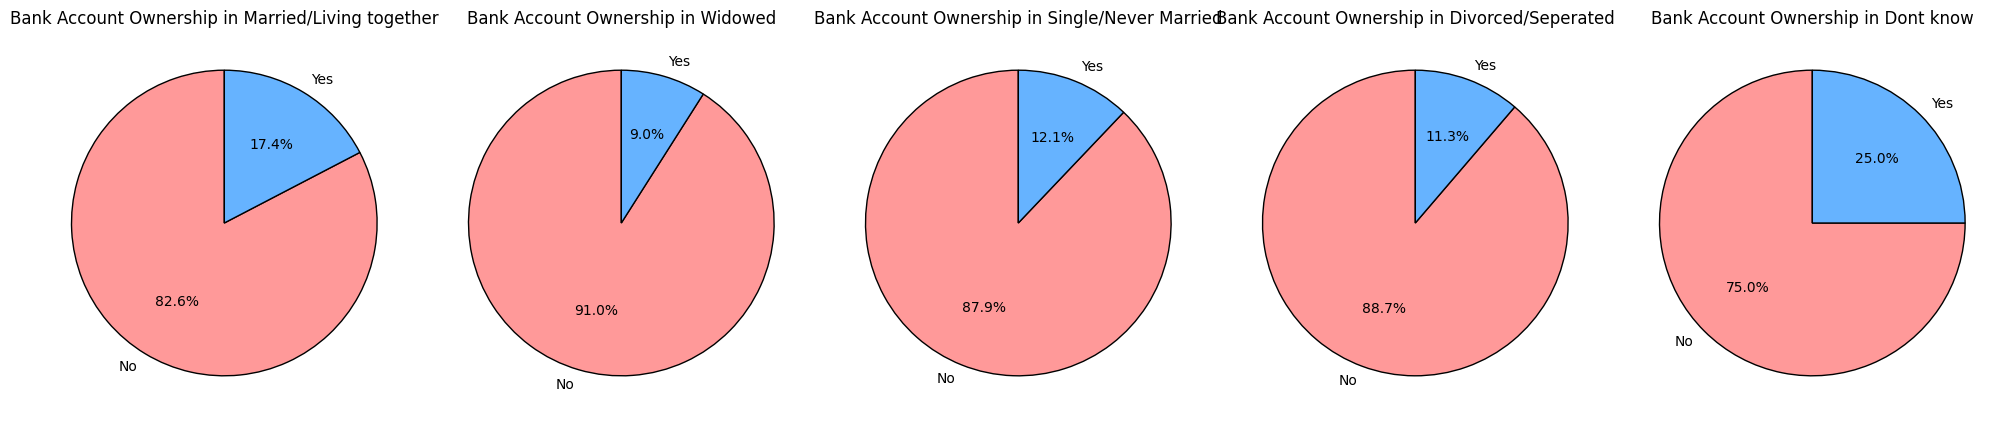

In [14]:
# 7. Marital status and bank account ownership (using pie chart)
# Get unique marital_status
marital_statuss = train["marital_status"].unique()

# Set up the figure and axes
fig, axes = plt.subplots(1,5 , figsize=(20, 5))

# Loop through each marital_status and plot a pie chart
for i, marital_status in enumerate(marital_statuss):
    # Filter data for the marital_status
    marital_status_data = train[train["marital_status"] == marital_status]["bank_account"].value_counts()
    
    # Pie chart
    axes[i].pie(marital_status_data, labels=marital_status_data.index, autopct='%1.1f%%', 
                colors=["#ff9999", "#66b3ff"], startangle=90, wedgeprops={"edgecolor": "black"})
    axes[i].set_title(f"Bank Account Ownership in {marital_status}")

# Show plot
plt.tight_layout()
plt.show()

#### 8. Does cellphone access affect financial inclusion?

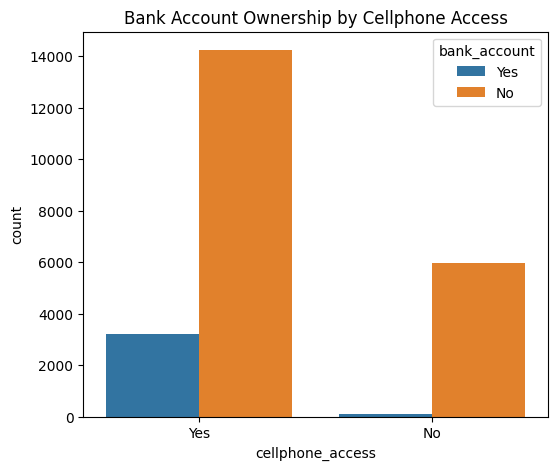

In [15]:
# 8. Cellphone access and financial inclusion
plt.figure(figsize=(6,5))
sns.countplot(x="cellphone_access", hue="bank_account", data=train)
plt.title("Bank Account Ownership by Cellphone Access")
plt.show()

#### 9. What is the trend of financial inclusion over the years?

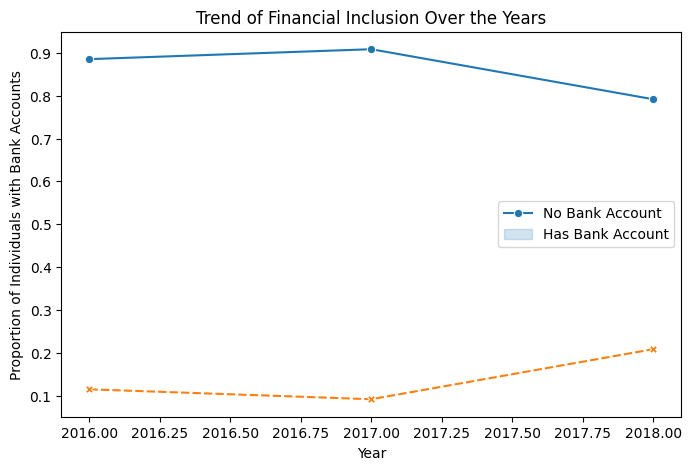

In [16]:
# 10. Trend of financial inclusion over the years
yearly_trend = train.groupby("year")["bank_account"].value_counts(normalize=True).unstack()
plt.figure(figsize=(8,5))
sns.lineplot(data=yearly_trend, markers=True)
plt.title("Trend of Financial Inclusion Over the Years")
plt.xlabel("Year")
plt.ylabel("Proportion of Individuals with Bank Accounts")
plt.legend(["No Bank Account", "Has Bank Account"])
plt.show()

# Feature Engineering & Preprocessing 

In [17]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler



In [19]:

# function to preprocess our data from train models
def preprocessing_data(data,feature_seleection=False):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    if feature_seleection:
        data=data.drop(["household_size"],axis=1)
    
    # scale our data into range of 0 and 1
    # scaler = MinMaxScaler(feature_range=(0, 1))
    # scaler = StandardScaler()
    scaler = RobustScaler()
    data = scaler.fit_transform(data)   

    return data                  

In [20]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

In [21]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


### Principal Component Analysis (PCA)

In [22]:
from sklearn.decomposition import PCA

# Reduce to 10 principal components
pca = PCA(n_components=12)
X_pca = pca.fit_transform(processed_train)
X_Test_pca = pca.transform(processed_test)

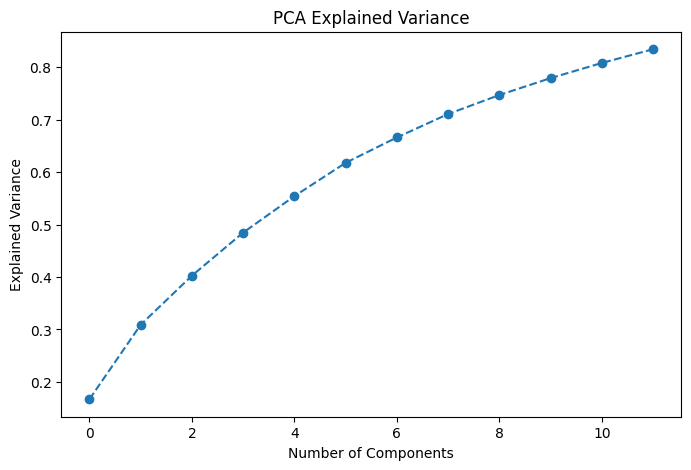

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


##  Split data into training and validation sets

In [24]:
# Split train_data
from sklearn.model_selection import train_test_split
X_Train, X_Val, y_Train, y_Val = train_test_split(X_pca, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

## Train & Evaluate Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Train Logistic Regression model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_Train, y_Train)

KNeighborsClassifier()

In [27]:
# Predictions and evaluation
y_pred = model.predict(X_Val)
accuracy = accuracy_score(y_Val, y_pred)
print("Initial Error rate of Logestic Regression classifier: ", 1 - accuracy)

Initial Error rate of Logestic Regression classifier:  0.1240968975775606


### Hyperparameter tuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

randomized_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=40,  # Number of random combinations to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

randomized_search.fit(X_Train, y_Train)


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 15],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [35]:
# Get best model parameters and performance
best_params = randomized_search.best_params_
best_model = randomized_search.best_estimator_



print("best cv  error rate : ", 1-randomized_search.best_score_)

best cv  error rate :  0.12337629991428256


In [36]:
# Train the Logistic Regression model on full training data
best_model.fit(X_Train, y_Train)
y_pred = best_model.predict(X_Val)
accuracy = accuracy_score(y_Val, y_pred)
1-accuracy

0.12197195070123246

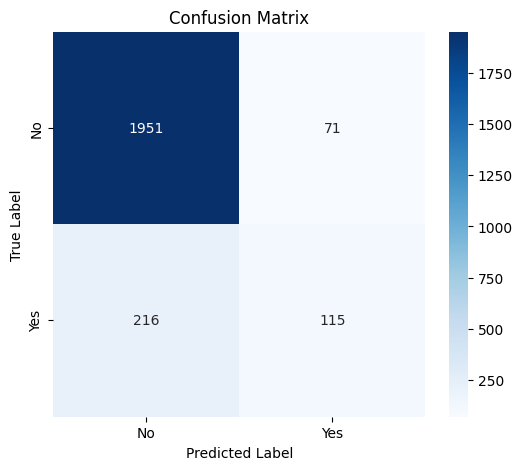

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
# Confusion Matrix
conf_matrix = confusion_matrix(y_Val, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [32]:
best_report = classification_report(y_Val, y_pred)
print("Best Model Report:\n", best_report)

Best Model Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2022
           1       0.62      0.35      0.44       331

    accuracy                           0.88      2353
   macro avg       0.76      0.66      0.69      2353
weighted avg       0.86      0.88      0.86      2353



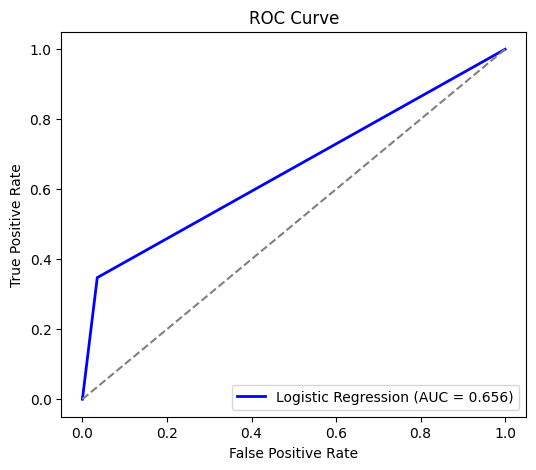

In [33]:
#  ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_Val, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Logistic Regression (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random model reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

## Making  submission

In [34]:
# Get the predicted result for the test Data
test.bank_account = best_model.predict(processed_test)

ValueError: X has 37 features, but KNeighborsClassifier is expecting 12 features as input.

In [113]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

In [114]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
2000,uniqueid_8069 x Kenya,0
7182,uniqueid_7457 x Tanzania,0
5784,uniqueid_11919 x Rwanda,0
4942,uniqueid_11077 x Rwanda,0
6329,uniqueid_12464 x Rwanda,0


In [115]:
import os

dir_path = "submission"
# Create directory if it does not exist
os.makedirs(dir_path, exist_ok=True)

In [117]:
# Create submission csv file csv file
submission.to_csv('submission/logestic_regression_robust_scaling.csv', index = False,)